In [ ]:
import numpy as np
import plotly.express as px
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load model and obtain mean absolute weight and absolute weight variance
models = [pickle.load(open('1dmodel1.p', 'rb')), pickle.load(open('1dmodel2.p', 'rb')), pickle.load(open('1dmodel3.p', 'rb'))]
weights_avg = np.zeros(15)
weights_std = np.zeros(15)
Js = [0.1, 0.1, 0.1, 0.1, 0.1, 10, 10, 10, 10, 10, 1000, 1000, 1000, 1000, 1000]

# Iterating over results
counter = 0
for idx in range(3):
  model = models[idx]
  for jdx in range(5):
    weights_avg[counter] = model.rbms[jdx].W.mean()
    if idx == 2:
      print(weights_avg[counter])
    weights_std[counter] = model.rbms[jdx].W.std()
    counter += 1

-0.0033659643094406015
0.004088921218218798
0.01523702287358332
0.05695975493267301
0.1551060295498648


In [ ]:
# Putting data into dataframe
arr = np.array([Js, weights_avg, weights_std, [1,2,3,4,5]*3]).T
df = pd.DataFrame(data=arr, columns=['J', 'absolute_avg', 'absolute_std', 'index'])
# Plotting results
fig = px.line(df, x="index", y="absolute_avg", color='J')
fig.show()

In [82]:
import plotly.graph_objects as go

# Setting up weights
model = models[1]
W = [model.rbms[idx].W.reshape(-1) for idx in range(5)]
names = ['RBM {}'.format(idx) for idx in range(1,6)]
fig = go.Figure(data=[go.Histogram(x=W[4], name=names[4], histnorm='probability density', nbinsx=200)])
# Plotting histograms
# for idx in range(3,-1,-1):
#   fig.add_trace(go.Histogram(x=W[idx], name=names[idx], histnorm='probability density',nbinsx=200))
# fig.update_layout(barmode='stack',
#                   title_text='RBM Weight Distributions', # title of plot
#                   xaxis_title_text='Weights', # xaxis label
#                   yaxis_title_text='Probability Density') # yaxis label
# # fig.update_traces(opacity=0.75)
# fig.show()

In [83]:
for idx in range(5):
  print('avg: {}, std: {}'.format(W[idx].mean(), W[idx].std()))
  print('W_max: {}'.format(np.abs(W[idx]).max()))

avg: 0.0038759171085611522, std: 0.19731434007288123
W_max: 3.0700241564183437
avg: 0.009742422191621516, std: 0.2948647746689103
W_max: 3.818098161210382
avg: 0.033441698109088924, std: 0.41300024398958834
W_max: 4.762350011612928
avg: 0.08889821787190101, std: 0.5555795346258344
W_max: 6.644763258641496
avg: 0.21243950962874847, std: 0.6100843135379618
W_max: 8.151171961406549


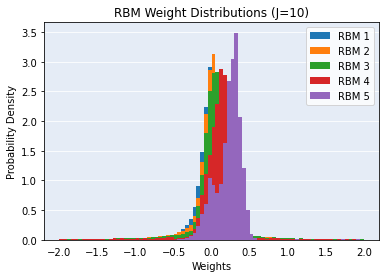

In [86]:
fig = plt.figure()
ax = plt.axes()
ax.patch.set_facecolor((229/255,236/255,246/255))
plt.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)         # ticks along the top edge are off)
plt.grid(axis = 'y', color='white')
ax.set_axisbelow(True)
for idx in range(5):
  plt.hist(W[idx],bins=80,density=True, label='RBM {}'.format(idx+1),range=(-2,2))
plt.legend()
plt.title('RBM Weight Distributions (J=10)')
plt.xlabel('Weights')
plt.ylabel('Probability Density')
plt.show()